# TPO Data Science 2025

##**GRUPO 4**  
##**Profesor: Ordiales Hernan**

## Integrantes:

- **Banchio Ezequiel** – Legajo: 1140416  
- **Cremona Bautista** – Legajo: 1161067  
- **Gamba Maximo** – Legajo: 1159365  
- **Garcia Pilar** – Legajo: 1148446  
- **Salemme Christian** – Legajo: 1152248  
- **Stoljenberg Ivan** – Legajo: 1158432  


# Introducción
Este trabajo tiene como propósito desarrollar una plataforma que facilite la toma de decisiones mediante el análisis de datos, transformando información cruda en insights claros y relevantes que apoyen estrategias efectivas y fundamentadas. El análisis de Business Intelligence es fundamental porque convierte datos sin procesar en información valiosa que permite reconocer patrones, tendencias y comportamientos, mejorando la eficacia en la toma de decisiones estratégicas.

En este caso, se trabajará con un dataset que contiene información sobre delitos ocurridos en la Ciudad de Buenos Aires. El conjunto de datos incluye registros de homicidios, hurtos sin violencia, lesiones y robos con violencia. A través de este análisis se busca plantear una necesidad de negocio vinculada a la seguridad ciudadana y diseñar un Data Warehouse junto con tableros de control que permitan visualizar los resultados y apoyar la toma de decisiones en el ámbito policial y de seguridad pública.


# Selección del dataset
El dataset utilizado para este proyecto proviene de registros oficiales de delitos ocurridos en la Ciudad de Buenos Aires entre los años 2016 y 2023. Este conjunto de datos se encuentra disponible públicamente en formato CSV con separador coma (,). Despues, el dataset original puede consultarse y descargarse desde el portal de datos abiertos de la Ciudad de Buenos Aires, en el siguiente enlace: https://data.buenosaires.gob.ar/dataset/delitos.

Decidimos elegir este dataset por su valor informativo y la variedad de variables que incluye, como dimensiones temporales (año, mes, día) y espaciales (barrio, comuna), además de detalles específicos del evento. Esto permite un análisis detallado y segmentado, facilitando la identificación de patrones y tendencias a nivel geográfico y temporal, siendo ideal para desarrollar soluciones basadas en datos que apoyen la toma de decisiones.

##Características del dataset
*   Dimensión temporal: Abarca un período de 8 años, desde 2016 hasta 2023.
*   Cantidad de registros: 1097145
*   Formato: CSV con separador coma (,).
*   Variables principales: id-mapa, año, mes, día, fecha, franja horaria, tipo y subtipo de delito, uso de arma, uso de moto, barrio, comuna, latitud, longitud y cantidad (número de incidentes).


# Valor aportado al negocio
El dominio del negocio elegido es la seguridad ciudadana en la Ciudad de Buenos Aires, con el objetivo de mejorar el uso de los recursos de la policía porteña obteniendo mejores resultados que en años anteriores. Nuestra hipótesis es que el análisis de los datos históricos de robos puede aportar valor de las siguientes maneras:

Optimización de patrullaje y despliegue de recursos. Esto lo podríamos hacer concentrando patrullas en franjas horarias y zonas con alta incidencia, lo que podría reducir la frecuencia de robos en un 10% respecto al año anterior.

Segmentar zonas por modus operandi. Saber qué modus operandi es más frecuente en diferentes zonas nos va a permitir equipar mejor a nuestros operativos; por ejemplo, si en Villa Urquiza el 70% de robos son en moto, equipar más motos ahí y menos en otros lugares para poder aumentar la cantidad de detenciones en un 5% que el año anterior.

Por último, modelos de predicción con un modelo de machine learning que pueda predecir con un 75% de acierto qué zonas sufrirán un robo en los próximos 7 días podrían servir para reforzar la presencia policial preventiva en esas zonas, lo que podría reducir los robos un 5% respecto al año anterior.

#Diagrama de arquitectura general de DataWarehouse
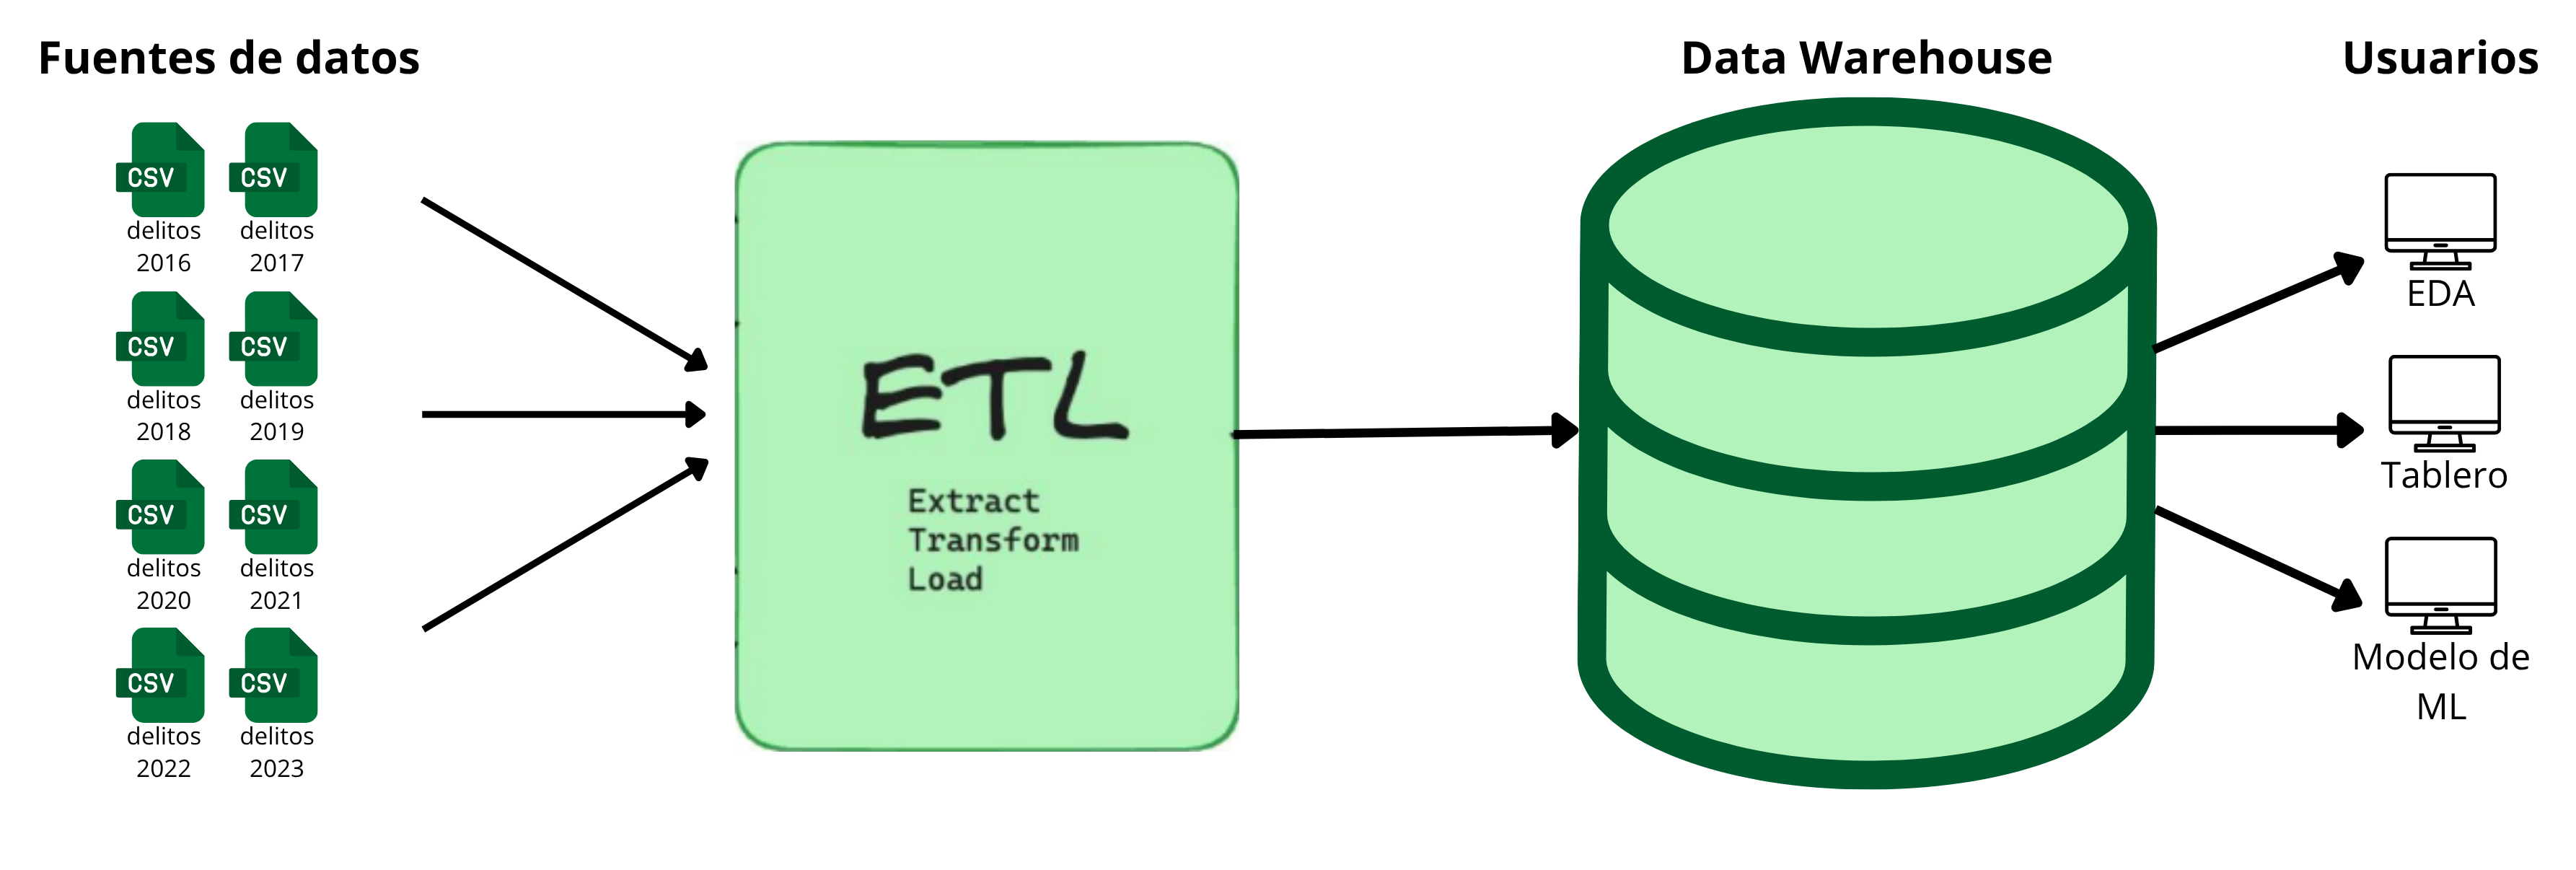

El proceso ETL (Extract, Transform, Load) consta de tres etapas fundamentales que aseguran la correcta integración y calidad de los datos antes de su análisis. En la fase de extracción, los datos son obtenidos directamente desde los archivos CSV que contienen los registros de delitos correspondientes a los años 2016 a 2023. Estos archivos representan las fuentes originales de información.

Luego, en la etapa de transformación, los datos son analizados, validados y limpiados. Este paso incluye la detección y corrección de errores, el tratamiento de valores faltantes, la estandarización de formatos y la eliminación de inconsistencias. Es una etapa crítica que garantiza la coherencia y uniformidad de la información, preparándola para su uso posterior.

Finalmente, en la fase de carga, los datos ya transformados se almacenan en el Data Warehouse, un repositorio centralizado y optimizado para consultas y análisis.

Realizar este proceso de manera estructurada permite tener un alto control sobre la calidad de los datos, lo que resulta esencial para asegurar que los análisis y modelos construidos sobre esa información sean confiables y precisos.

# Limpieza del dataset


In [ ]:
import pandas as pd
import re

df_2016 = pd.read_csv("/content/delitos_2016.csv")
df_2017 = pd.read_csv("/content/delitos_2017.csv")
df_2018 = pd.read_csv("/content/delitos_2018.csv")
df_2019 = pd.read_csv("/content/delitos_2019.csv")
df_2020 = pd.read_csv("/content/delitos_2020.csv")
df_2021 = pd.read_csv("/content/delitos_2021.csv")
df_2022 = pd.read_csv("/content/delitos_2022.csv")
df_2023 = pd.read_csv("/content/delitos_2023.csv", sep=";")


dataframes_limpios = []
for anio in range(2016, 2024):
    df = globals().get(f"df_{anio}")
    if df is not None:
        #1° Transformación - Cambio de los valores "si" y "no" por 1 y 0 en las columnas "uso_arma" y "uso_moto"
        #Justificación: Convertimos estos valores a formato numérico para poder analizarlos más fácilmente y usarlos en modelos de predicción.
        #Esto es útil, por ejemplo, para saber en qué zonas o momentos se usan más armas o motos en los robos, y así poder tomar mejores decisiones sobre cómo equipar a los patrulleros.

        df['uso_arma'] = df['uso_arma'].map({'SI': 1, 'NO': 0})
        df['uso_moto'] = df['uso_moto'].map({'SI': 1, 'NO': 0})



        #2° Transformación - Eliminacion de las filas que tienen valores nulos en la columna 'barrio'
        #Justificación: El barrio es un dato clave para ubicar geográficamente los robos.
        #Si falta, no podemos saber dónde ocurrió el hecho, así que esas filas no nos sirven para planificar estrategias de patrullaje o análisis por zona.

        df.dropna(subset=['barrio'], inplace=True)



        #3° Transformación - Reemplazar 'ñ' por 'ni' en 'barrio'
        #Justificación: A veces la “ñ” puede traer problemas de codificación o inconsistencias en los nombres de barrios. Con esta limpieza evitamos errores y aseguramos que todos los datos estén bien unificados para el análisis.

        df['barrio'] = df['barrio'].str.replace('ñ', 'ni', regex=False)



        # 4° Transformación - Normalizar y validar el campo 'comuna' para asegurar que sea numérico
        # Justificación: Necesitamos que la columna 'comuna' tenga valores numéricos (por ejemplo, 1.0, 8.0) para poder agrupar y analizar los datos por zona.
        # En algunos registros, la comuna puede estar escrita con letras (como 'CC-08'), por lo que extraemos el número correspondiente.
        # Si no se puede identificar una comuna válida, eliminamos esa fila para evitar interferencias en el análisis.
        # Esto es clave para detectar qué comunas tienen más robos y así planificar mejor la distribución de recursos policiales.

        # Extraer solo el número de la comuna (por ejemplo, de 'CC-08' obtener '08')
        df['comuna'] = df['comuna'].astype(str).str.extract(r'(\d+)', expand=False)

        # Eliminar filas donde no se pudo extraer ningún número
        df.dropna(subset=['comuna'], inplace=True)

        # Convertir a float para que quede como 8.0, 3.0, etc.
        df['comuna'] = df['comuna'].astype(float)



        #5° Transformación - Filtrar registros fuera del rango de fechas válidas
        #Justificación: Garantiza que los análisis se realicen solo con datos confiables y dentro del rango temporal de interés.

        #Convertimos la columna fecha a datetime
        df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
        df = df[(df['fecha'] >= '2016-01-01') & (df['fecha'] <= '2023-12-31')]



        #6° Transofrmación - Eliminar filas donde 'franja' no esté entre 0 y 23
        #Justificación: La franja horaria es clave para saber en qué momento del día ocurren más robos. Si hay valores fuera del rango horario normal, es probable que estén mal cargados.
        #Los eliminamos para que el análisis sea más confiable y nos ayude a planificar mejor los horarios de patrullaje.

        #Convertimos la columna franja a un dato numerico
        df['franja'] = pd.to_numeric(df['franja'], errors='coerce')
        df = df[(df['franja'] >= 0) & (df['franja'] <= 23)]

        print(f"\n--- Primeras filas del dataset {anio} ---")
        print(df.head(5))

        #7° Transformacion - Estarandizar los dias a un solo formato ya que habia distantas apariciones del mismo dia como LUN y LUNES.
        # Convertir todo a mayúsculas
        df["dia"] = df["dia"].str.upper()

        # Unificar abreviaturas a nombres completos
        reemplazos = {
        "LUN": "LUNES", "MAR": "MARTES", "MIE": "MIERCOLES", "JUE": "JUEVES",
        "VIE": "VIERNES", "SAB": "SABADO", "DOM": "DOMINGO"
          }

        df["dia"] = df["dia"].replace(reemplazos)

        #8° Transformacion - pasar todos los meses a mayuscula ya que aparecen meses como enero o ENERO.
        df["mes"] = df["mes"].str.upper()

        # Agregamos a la lista de dataframes limpios
        dataframes_limpios.append(df)

df_final = pd.concat(dataframes_limpios, ignore_index=True)
df_final.to_csv("/content/delitos_2016-2023.csv", index=False)
#df_final.sample(n=50)

-------- 2023 -----------

--- Primeras filas del dataset 2016 ---
   id-mapa  anio    mes        dia      fecha  franja  tipo     subtipo  \
0   500001  2016  ENERO     MARTES 2016-01-26    21.0  Robo  Robo total   
1   500004  2016  ENERO  MIERCOLES 2016-01-20    16.0  Robo  Robo total   
2   500007  2016  ENERO    DOMINGO 2016-01-03    13.0  Robo  Robo total   
3   500010  2016  ENERO     SABADO 2016-01-09    17.0  Robo  Robo total   
4   500013  2016  ENERO      LUNES 2016-01-25    18.0  Robo  Robo total   

   uso_arma  uso_moto      barrio  comuna    latitud   longitud  cantidad  
0         0         0  VILLA REAL    10.0 -34.617668 -58.530961         1  
1         0         0  VILLA REAL    10.0 -34.620262 -58.530738         1  
2         1         0     LINIERS     9.0 -34.640094 -58.529826         1  
3         0         0     LINIERS     9.0 -34.640094 -58.529826         1  
4         0         0     LINIERS     9.0 -34.640094 -58.529826         1  

--- Primeras filas del da

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluación de la calidad de datos

###1º Metrica: Completitud

Esta metrica mide la proporción de datos almacenados frente al potencial de
100% completo.

En este caso analizaremos la completitud de la columna "tipo" que se refiere al tipo de delito correspondiente al registro.

####Justificacion

El tipo de delito resulta clave a la hora de segmentarlos, nos da la posibilidad de encontrar patrones, comportamientos y puede indicar la prioridad que se le da a cada uno.

####Umbral de aceptación

Al ser un dato tan importante, no podemos permitir que este por debajo del 95%.
Este numero lo vamos a calcular con Python, utilizando la formula de:
- Completitud = (registros completos/registros potenciales) * 100

*Calculado al final de la seccion.

###2º Metrica: Validez/Integridad

Esta metrica mide si los datos se ajustan a la sintaxis (formato, tipo, rango)
de su definición. Integridad y exactitud.

En este caso analizaremos la validez de la columna "franja" que se refiere al horario del delito.

####Justificacion

La franja horaria es clave para saber en qué momento del día ocurren más robos. Si hay valores fuera del rango horario normal, el análisis no sería confiable y no terminaría de ayudar a planificar los horarios de patrullaje.

####Umbral de aceptación

Al ser un dato tan importante, no podemos permitir que este por debajo del 95%.
Este numero lo vamos a calcular con Python, utilizando la formula de:
- Validez = (registros validos/registros totales) * 100

*Calculado al final de la seccion.

In [ ]:
df = pd.read_csv("/content/delitos_2016-2023.csv")

# Calcular completitud de la columna 'tipo'
completitud_tipo = df['tipo'].notna().mean() * 100

print(f"Completitud del campo 'tipo': {completitud_tipo:.2f}%")

# Convertir 'franja' a numérico por si viene como string
df['franja'] = pd.to_numeric(df['franja'], errors='coerce')

# Definir rango válido (por ejemplo, entre 0 y 23 inclusive)
validez_franja = df['franja'].between(0, 23).mean() * 100

print(f"Validez del campo 'franja': {validez_franja:.2f}%")


/tmp/ipython-input-29-2439431729.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/delitos_2016-2023.csv")


Completitud del campo 'tipo': 100.00%
Validez del campo 'franja': 100.00%


#Análisis exploratorio (EDA)

A continuación se realizará un análisis exploratorio que se centrará  en el estudio de la modalidad delictiva conocida como “robo en moto”, hipótesis desarrollada anteriormente. El objetivo principal es determinar si existen diferencias significativas entre comunas en cuanto a la proporción de robos cometidos con el uso de motos, lo que podría aportar información valiosa y descubrimientos para lograr un mejor entendimiento del dataset.

/tmp/ipython-input-3-76100464.py:7: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/delitos_2016-2023.csv")
/tmp/ipython-input-3-76100464.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


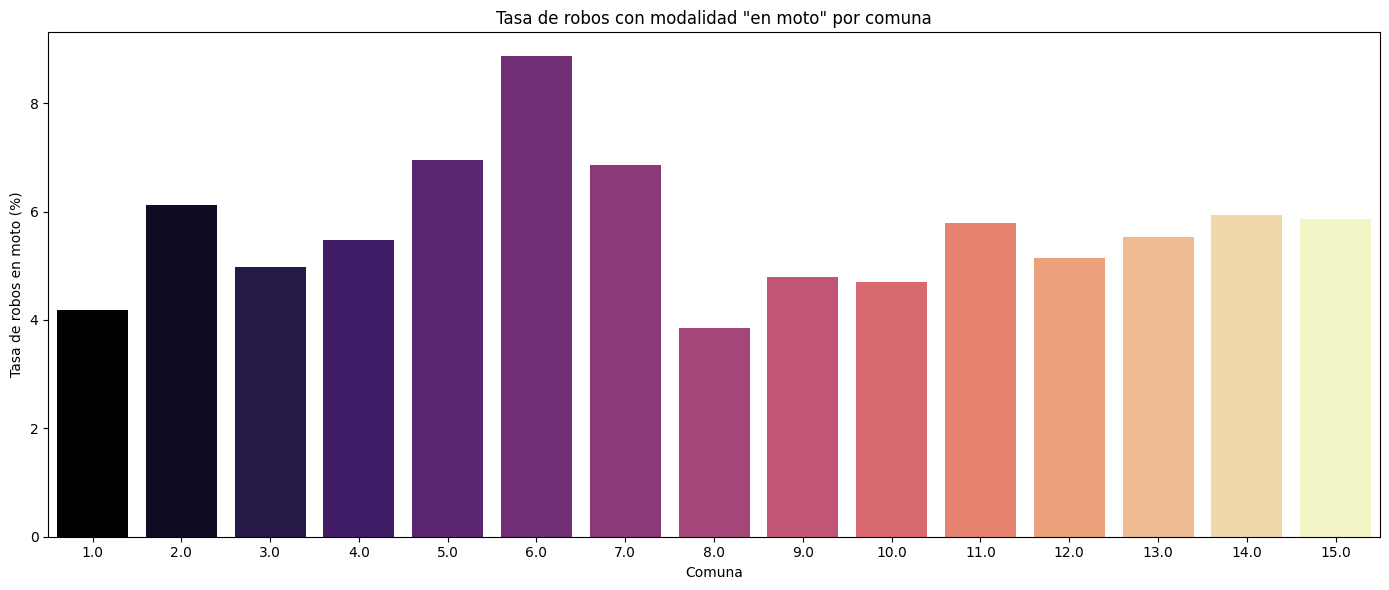


 Top 3 comunas con mayor tasa de robos en moto:
• Comuna 6: 8.86%
• Comuna 5: 6.96%
• Comuna 7: 6.86%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np

df = pd.read_csv("/content/delitos_2016-2023.csv")

# Cálculo de tasas
df_moto = df[df['uso_moto'] == 1]
robos_moto_comuna = df_moto.groupby('comuna')['cantidad'].sum()
total_delitos_comuna = df.groupby('comuna')['cantidad'].sum()
tasa_moto_comuna = (robos_moto_comuna / total_delitos_comuna) * 100
tasa_moto_comuna = tasa_moto_comuna.dropna()

# Asegurar orden por comuna del 1 al 15
tasa_moto_comuna = tasa_moto_comuna.sort_index()

# Crear colores en orden lineal con magma_r
cmap = plt.cm.magma_r
colors = cmap(np.linspace(1, 0, len(tasa_moto_comuna)))
colors = colors.tolist()


# Graficar
plt.figure(figsize=(14, 6))
sns.barplot(
    x=tasa_moto_comuna.index.astype(str),
    y=tasa_moto_comuna.values,
    palette=colors
)
plt.xlabel('Comuna')
plt.ylabel('Tasa de robos en moto (%)')
plt.title('Tasa de robos con modalidad "en moto" por comuna')
plt.tight_layout()
plt.show()

top_3 = tasa_moto_comuna.nlargest(3)
print("\n Top 3 comunas con mayor tasa de robos en moto:")
for comuna, tasa in top_3.items():
    print(f"• Comuna {int(comuna)}: {tasa:.2f}%")

El análisis mostró que algunas comunas presentan tasas de robos en moto significativamente más altas que otras. Por ejemplo, la Comuna 6, la Comuna 5 y la Comuna 7 destacaron por tener las tasas más elevadas, superando la media general. Esto sugiere una posible concentración geográfica de esta modalidad delictiva. En contraste, comunas como la 8 y la 1 mostraron tasas muy bajas, cercanas al 4%, lo que indicaría una menor prevalencia del uso de motos en hechos delictivos en esas zonas. También se observó que comunas con alta cantidad total de delitos no necesariamente tienen alta proporción de robos en moto, como es el caso de la Comuna 1, lo que refleja diferencias en los tipos de delitos predominantes en cada área. Como se muestra en el anterior gráfico de barras.


<ipython-input-5-58c78af2399c>:5: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/delitos_2016-2023.csv")


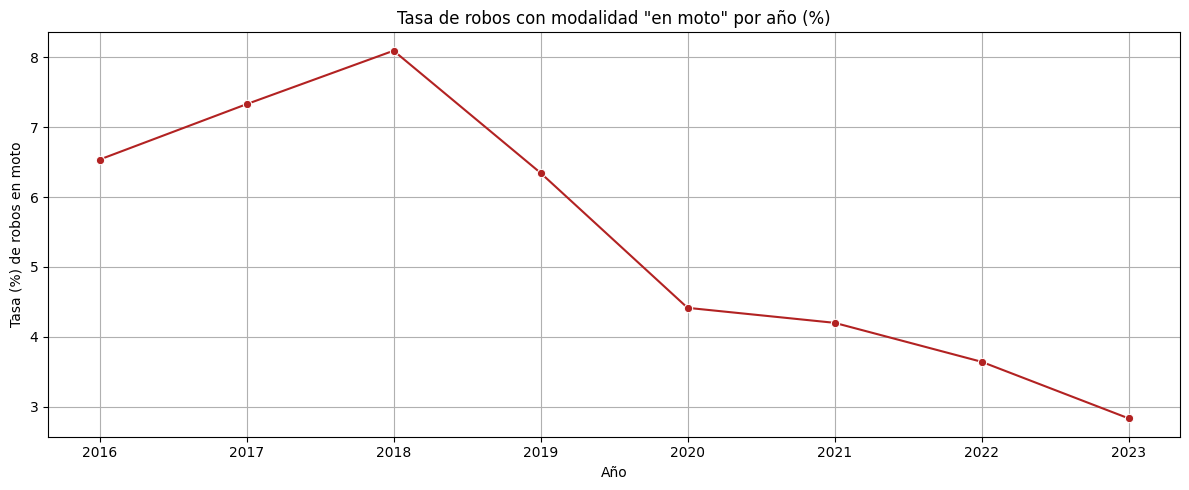

In [ ]:
df = pd.read_csv("/content/delitos_2016-2023.csv")
# Agrupar total de delitos y delitos en moto por año
df['anio'] = df['anio'].astype(int)
total_delitos_anio = df.groupby('anio')['cantidad'].sum()
robos_moto_anio = df[df['uso_moto'] == 1].groupby('anio')['cantidad'].sum()

# Calcular tasa en %
tasa_moto_anio = (robos_moto_anio / total_delitos_anio) * 100
tasa_moto_anio = tasa_moto_anio.dropna().sort_index()

# Graficar
plt.figure(figsize=(12, 5))
sns.lineplot(x=tasa_moto_anio.index, y=tasa_moto_anio.values, marker='o', color='firebrick')
plt.title('Tasa de robos con modalidad "en moto" por año (%)')
plt.xlabel('Año')
plt.ylabel('Tasa (%) de robos en moto')
plt.grid(True)
plt.tight_layout()
plt.show()


Durante el período 2016–2023, se registra una evolución significativa en la tasa de robos cometidos con la modalidad "en moto". Entre 2016 y 2018, la tendencia fue ascendente, alcanzando un valor máximo en 2018 con una tasa superior al 8%. A partir de ese año, se observa un descenso sostenido y progresivo, con una reducción marcada en 2019 y 2020, y una continuidad de la baja hasta llegar a menos del 3% en 2023.

Esta caída representa una disminución de más del 60% respecto al pico de 2018, y podría estar vinculada a múltiples factores, como el refuerzo de controles policiales, regulaciones sobre la circulación de motocicletas, avances en tecnología de vigilancia y cambios en el comportamiento delictivo. La tendencia descendente mantenida durante cinco años consecutivos sugiere un impacto efectivo y sostenido de las políticas de prevención y control implementadas en este período.

###Insights:


*   Las comunas con mayor tasa de robos en moto son:

    - Comuna 6  con una tasa de 8.86%
    - Comuna 5  con una tasa de 6.96%
    - Comuna 7  con una tasa de 6.86%

*   Hay una fuerte concentración de este tipo de delito en ciertas comunas limitrofes entre sí, lo que puede sugerir patrones geográficos de movilidad delictiva.



*   Desde 2018 hasta 2023, los robos con modalidad "en moto" se redujeron más de un 60%, reflejando el impacto de controles y políticas específicas. La baja sostenida durante cinco años indica un cambio estructural en esta modalidad delictiva, que dejó de ser una de las principales preocupaciones urbanas.








### Hipótesis 2: “La mayoría de los delitos ocurren durante franjas horarias específicas, especialmente la noche”

Nuestra hipótesis en este caso es que se podría identificar un patrón claro analizando la cantidad de delitos por franja horaria.

Para comprobar si esta hipótesis es cierta de manera eficiente usamos Python para realizar un gráfico de barras donde podamos ver qué patrones se presentan analizando esta variable.

/tmp/ipython-input-19-3021028193.py:4: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/delitos_2016-2023.csv')


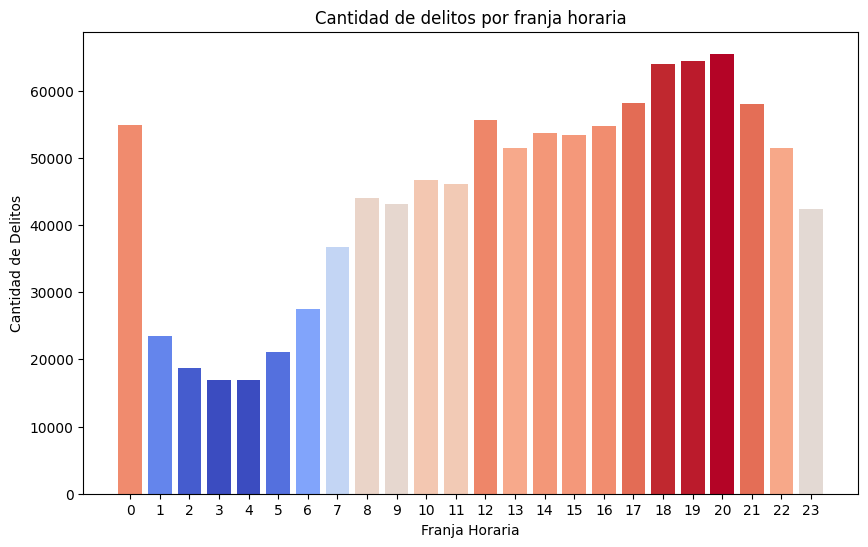

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/delitos_2016-2023.csv')
df['franja'] = df['franja'].fillna(-1).astype(int)
delitos_por_franja = df['franja'].value_counts().sort_index()

valores = delitos_por_franja.values
norm = plt.Normalize(valores.min(), valores.max())
colors = plt.cm.coolwarm(norm(valores))

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(delitos_por_franja.index, valores, color=colors)
plt.xticks(range(0, 24))
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Delitos')
plt.title('Cantidad de delitos por franja horaria')
plt.show()

####Insights:

**Pico nocturno de delitos:** La mayor concentración de delitos ocurre entre las 17:00 y las 22:00 horas, alcanzando su punto máximo entre las 18 y 20 hs. Este pico en los delitos se podria dar por una mayor circulación (gente saliendo de la facultad, trabajo, etc). Tambien coincide con el anochecer, lo que podria validar nuestra hipotesis.

**Alta incidencia justo a medianoche:** La franja de las 0:00 hs también muestra un número muy alto de delitos, comparable a las horas pico anteriores.

**Descenso abrupto luego de la medianoche:** A partir de la 1:00 AM, la cantidad de delitos disminuye rápidamente, manteniéndose baja hasta las primeras horas de la mañana. Esto sugiere una menor actividad delictiva en la madrugada.

**Menor riesgo durante el día:** Entre las 2 y 8 AM, así como la mañana y el mediodía, muestran valores más bajos de delitos. Esto puede reflejar tanto menor circulación como mayor vigilancia o menor oportunidad para ciertos tipos de delitos.

Con estos datos obtenidos, podemos confirmar que sí existe una franja horaria con más delitos, y ésta se encuentra entre las 18 y 20hs. También se muestra una suba en los delitos a medida que avanza el día, comenzando a las 4am subiendo de manera casi constante hasta las 8pm, donde se encuentra la máxima concentración de delitos.

#Procesamiento con algoritmo de Machine Learning

En el marco del análisis delictivo de la Ciudad Autónoma de Buenos Aires, se propuso construir un modelo de Machine Learning para predecir el tipo de delito que tiene mayor probabilidad de ocurrir, dadas ciertas condiciones conocidas al momento del hecho.

¿Qué elegimos predecir?
El objetivo del modelo es predecir la variable tipo, que representa la categoría general del delito (por ejemplo: Robo, Hurto, Amenazas, etc.).

¿Por qué lo elegimos?
Poder anticipar el tipo de delito en función de variables como la comuna, la franja horaria, el uso de arma y moto, y el mes, permite:

Optimizar recursos policiales según el contexto esperado.

Anticipar qué modalidad delictiva puede presentarse en cada situación.

Apoyar la toma de decisiones operativas con un enfoque preventivo.

Algoritmo utilizado:
Se implementó el algoritmo Random Forest, un modelo de clasificación supervisado que construye múltiples árboles de decisión y combina sus predicciones para obtener un resultado más robusto. Random Forest fue elegido por su capacidad para manejar datos con muchas variables categóricas, su resistencia al sobreajuste y su buen rendimiento en problemas de clasificación multiclase.

1. Definir X (features) e y (target)

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/delitos_2016-2023.csv")

y = df['tipo']

X = df[['mes', 'dia', 'uso_arma', 'uso_moto', 'comuna', 'franja']]
X = pd.get_dummies(X, drop_first=True)  # evita multicolinealidad

le = LabelEncoder()
y_encoded = le.fit_transform(y)

/tmp/ipython-input-7-3289414978.py:3: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/delitos_2016-2023.csv")


2. Dividir en train y test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

3. Aplicar SMOTE para balancear (oversampling)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

4. Entrenar el modelo

In [ ]:
#Entrenamiento
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

5. Prediccion y evaluacion

Accuracy: 0.345744655976281

Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.29      0.18     14916
           1       0.00      0.02      0.01       184
           2       0.43      0.37      0.40     71172
           3       0.14      0.27      0.19     20064
           4       0.77      0.37      0.50     93790
           5       0.09      0.23      0.13     13711

    accuracy                           0.35    213837
   macro avg       0.26      0.26      0.23    213837
weighted avg       0.51      0.35      0.39    213837



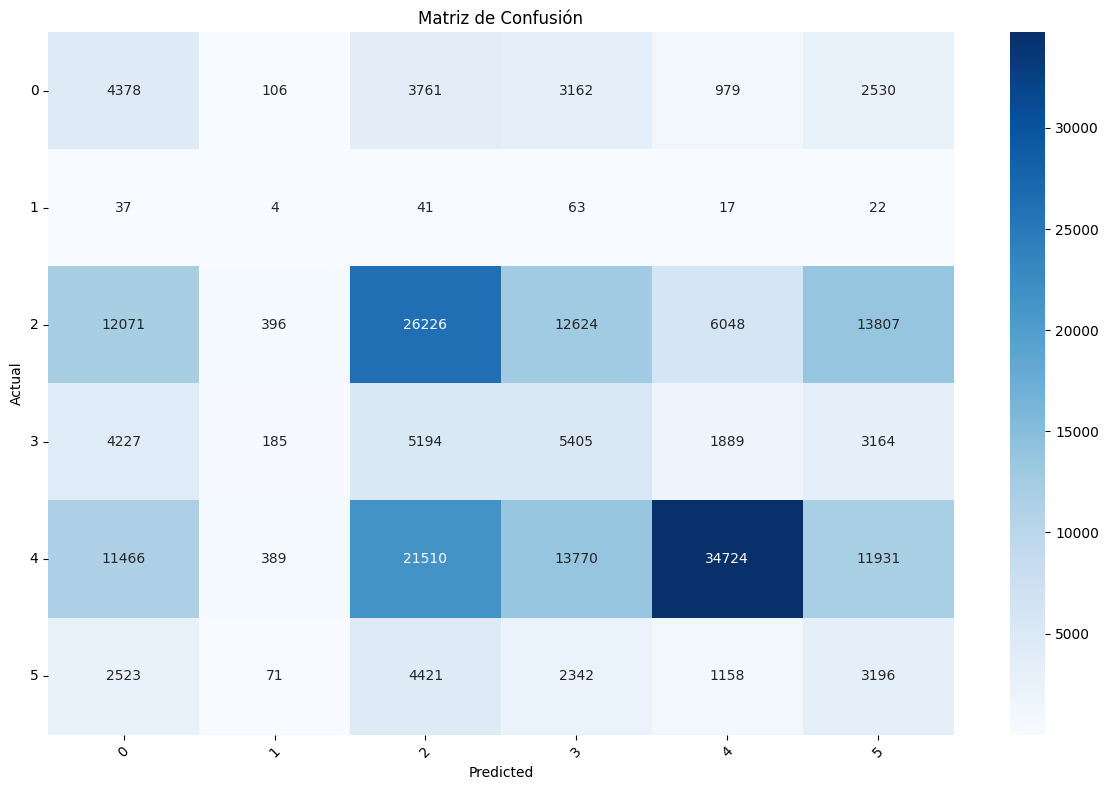

In [ ]:
#Prediccion y evaluacion
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicción
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Reporte
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Mismo modelo pero agrupando los tipos "Homicidio", "Lesiones", "Amenazas" y "Vialidad" en "Otros".
Se agrupan porque son clases poco frecuentes, lo que puede afectar la precisión del modelo. Al unificarlas como "Otros", se mejora el rendimiento y la estabilidad del algoritmo.

Accuracy (agrupado): 0.4763675135734228

Classification Report (agrupado):
               precision    recall  f1-score   support

       Hurto       0.42      0.54      0.47     71172
       Otros       0.35      0.22      0.27     48875
        Robo       0.57      0.56      0.57     93790

    accuracy                           0.48    213837
   macro avg       0.45      0.44      0.44    213837
weighted avg       0.47      0.48      0.47    213837



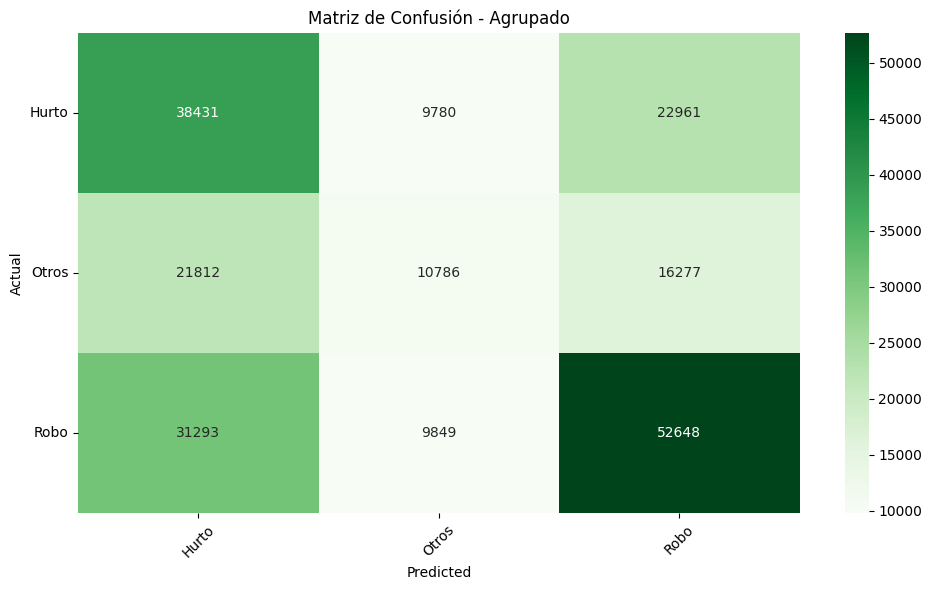

,proportion
tipo_reducido,
Robo,0.438606
Hurto,0.332835
Otros,0.228559


In [ ]:
# Reemplazo de clases menos frecuentes
df["tipo_reducido"] = df["tipo"].replace({
    "Homicidios": "Otros",
    "Lesiones": "Otros",
    "Amenazas": "Otros",
    "Vialidad": "Otros"
})

# Repetir el proceso con la nueva variable
y_reducido = df["tipo_reducido"]
X = df[['mes', 'dia', 'uso_arma', 'uso_moto', 'comuna', 'franja']]
X = pd.get_dummies(X, drop_first=True)
#X = df.drop(columns=["tipo", "tipo_reducido"])

X_train, X_test, y_train, y_test = train_test_split(X, y_reducido, test_size=0.2, random_state=42, stratify=y_reducido)

# Nuevo modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = rf.predict(X_test)

print("Accuracy (agrupado):", accuracy_score(y_test, y_pred))
print("\nClassification Report (agrupado):\n", classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=rf.classes_, yticklabels=rf.classes_, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión - Agrupado")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
df["tipo_reducido"].value_counts(normalize=True)


##Conclusión de los modelos de Machine Learning
Se entrenaron dos modelos: uno con todas las clases originales y otro agrupando clases poco frecuentes bajo "Otros". Si bien la precisión general solo mejoró levemente (de 0.35 a 0.48), el modelo agrupado mostró mejor equilibrio entre clases y logró predecir correctamente casos antes ignorados, como se ve en el F1-score de la clase "Otros".

**Los modelos actuales no alcanzan los niveles de precisión y confiabilidad requeridos para su implementación en un entorno real**. La principal limitación identificada es el marcado desbalanceo en las clases del dataset, lo cual compromete seriamente el rendimiento del modelo, especialmente en la detección de clases minoritarias.

En este sentido, se lo considera un prototipo con potencial de evolución, pero su mejora requiere:

*   Una revisión exhaustiva del dataset y de la distribución de sus variables.
*   La incorporación de fuentes de datos complementarias que permitan enriquecer y equilibrar la información disponible.
*   La aplicación rigurosa de técnicas de validación cruzada.
*   El ajuste de las métricas de evaluación y de las hipótesis operativas para reflejar con mayor precisión el comportamiento esperado en producción.

#Tablero de comando
El tablero desarrollado en Power BI ofrece una visualización integral de los robos en la Ciudad de Buenos Aires, estructurada en múltiples gráficos que permiten analizar distintos aspectos del fenómeno delictivo.

Presenta un gráfico de barras agrupadas que compara la cantidad de robos con uso de arma y con moto en cada barrio, facilitando la identificación de patrones según modalidad y ubicación. Asimismo, incluye un gráfico de barras horizontales que refleja el total de robos por barrio, sin segmentar por tipo de robo.

Para observar la evolución temporal, se incorpora un gráfico de líneas que muestra la variación anual en la cantidad de robos registrados. Complementa el análisis un gráfico tipo radar que distribuye los robos a lo largo del día, segmentados por franjas horarias.

Además, el tablero cuenta con filtros laterales que permiten seleccionar años y barrios específicos, brindando flexibilidad para realizar análisis más detallados y personalizados.

A continuación se muestra una imagen del gráfico generado en el tablero. Además, mediante el código QR que acompaña la imagen, se puede acceder e interactuar directamente con el tablero completo para explorar los datos de forma dinámica.

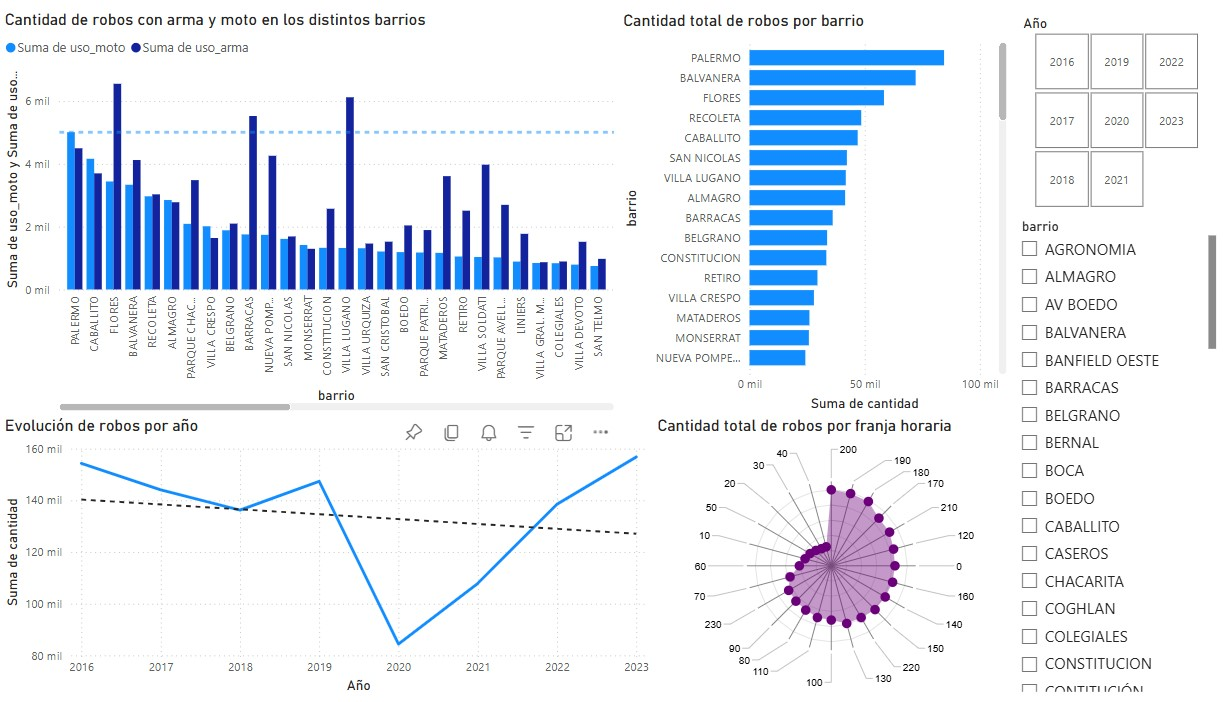

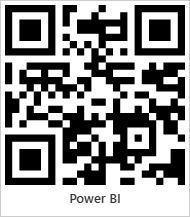

In [ ]:
from IPython.display import Image, display

display(Image('/content/delitos_powerBI.jpg'))
display(Image('/content/delitos_qr.jpg'))


#Conclusiones y trabajo futuro

Este trabajo abordó el análisis de datos delictivos en la Ciudad Autónoma de Buenos Aires con el objetivo de generar herramientas de soporte para la toma de decisiones en el ámbito de la seguridad pública. A partir de datos abiertos, se realizó un pipeline completo que incluyó limpieza, evaluación de calidad, análisis exploratorio y la aplicación inicial de técnicas de Machine Learning.

Durante la fase de limpieza, se normalizaron los datos provenientes de distintos años y se corrigieron múltiples inconsistencias. Esto permitió generar un dataset unificado y apto para análisis.

El análisis exploratorio reveló algunos patrones delictivos, como franjas horarias críticas y comunas con mayor proporción de robos en moto. Sin embargo, las métricas clave no arrojaron resultados concluyentes. La tasa de robos en moto por comuna y la tasa de delitos con uso de arma por tipo de delito se mantuvieron, en la mayoría de los casos, por debajo de los umbrales definidos para considerar intervenciones prioritarias. Esto dificulta extraer acciones decisivas a partir del análisis.

Por otro lado, el modelo de Machine Learning no alcanzó niveles de precisión ni robustez suficientes como para ser considerado confiable en un entorno productivo. Esto se debió en parte a la falta de ciertas variables relevantes, posibles sesgos en los datos y la necesidad de mayor volumen y calidad de información.

El tablero de control desarrollado es funcional desde el punto de vista visual y estructural, pero su valor estratégico se ve limitado por la debilidad de los datos de entrada y las métricas resultantes.

En vistas a futuros trabajos, uno de los principales desafíos será mejorar el desempeño del modelo de Machine Learning. Para ello, se recomienda abordar con mayor profundidad el problema de desbalanceo de clases, para esto, sería conveniente probar algoritmos de ensamble más complejos, como XGBoost o LightGBM, que podrían adaptarse mejor a la naturaleza del problema.

Estas líneas futuras permitirán fortalecer tanto la base de datos como las herramientas analíticas, acercándose al objetivo de brindar soporte real a políticas públicas basadas en evidencia.

